In [2]:
import pandas as pd 

medals = pd.read_csv('summer.csv')

# Select the 'Country' column of medals: country_names
country_names = medals.loc[:,'Country']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))


USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
Name: Country, dtype: int64


In [1]:
import pandas as pd 

medals = pd.read_csv('Summer.csv')

# Construct the pivot table: counted
counted = medals.pivot_table(index="Country",columns='Medal',values='Athlete',aggfunc='count')

# Group medals by 'Country': country_grouped
country_grouped = medals.groupby('Country')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Create the new column: counted['Unique']
counted['Unique'] = Nsports

# Create the new column: counted['Totals']
counted['Totals'] = counted[['Gold', 'Silver', 'Bronze']].sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('Totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal    Bronze    Gold  Silver  Unique  Totals
Country                                        
USA      1098.0  2235.0  1252.0      34  4585.0
URS       584.0   838.0   627.0      21  2049.0
GBR       553.0   546.0   621.0      33  1720.0
FRA       497.0   408.0   491.0      29  1396.0
GER       475.0   452.0   378.0      27  1305.0
ITA       404.0   476.0   416.0      22  1296.0
AUS       472.0   312.0   405.0      23  1189.0
HUN       351.0   412.0   316.0      18  1079.0
SWE       328.0   349.0   367.0      22  1044.0
NED       339.0   233.0   279.0      20   851.0
GDR       225.0   329.0   271.0      16   825.0
CHN       221.0   290.0   296.0      25   807.0
JPN       303.0   213.0   272.0      22   788.0
RUS       291.0   239.0   238.0      22   768.0
CAN       262.0   155.0   232.0      23   649.0


In [3]:
import pandas as pd 

medals = pd.read_csv('summer.csv')

# Extract all rows for which the 'Year' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Year >= 1952) & (medals.Year <= 1988)

# Extract rows for which 'Country' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.Country.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('Country')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

Nsports = Nsports.rename('Unique Sports Won')

# Print Nsports
print(Nsports)


# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Year',columns='Country',values='Athlete',aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')
most_medals = most_medals.rename('Country with most medals per year')

# Print most_medals & most_medals.value_counts()
print(most_medals)
print(most_medals.value_counts())


Country
URS    21
USA    20
Name: Unique Sports Won, dtype: int64
Year
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
Name: Country with most medals per year, dtype: object
URS    8
USA    2
Name: Country with most medals per year, dtype: int64


Medal  Bronze  Silver  Gold
Year                       
1896        2       7    11
1900       14      14    27
1904      111     137   146
1908       15      14    34
1912       31      25    45
1920       38      45   110
1924       51      37   110
1928       17      24    43
1932       59      44    78
1936       15      26    51
1948       35      30    83
1952       28      23    79
1956       20      37    61
1960       21      23    68
1964       36      36    78
1968       35      31    83
1972       43      59    53
1976       36      56    63
1984       50     115   168
1988       52      64    77
1992       85      50    89
1996       52      48   160
2000       52      66   130
2004       73      75   116
2008       81     109   125
2012       46      57   147


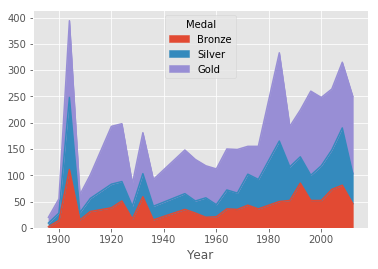

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt


medals = pd.read_csv('summer.csv')

#Make medals['Medal'] categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals['Country'] == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Year', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

print(usa_medals_by_year)


# Plot the DataFrame usa_medals_by_year
plt.style.use('ggplot')
usa_medals_by_year.plot.area()

plt.show()